# Exploratory Data Analysis - Titanic

### Note : You can get the data from this kaggle [link]('https://www.kaggle.com/c/titanic/download/train.csv') 

## 1. Reading the data

In [2]:
import pandas as pd
import numpy as np

In [3]:
titanic_data = pd.read_csv('data/train.csv')

### Print the first 5 rows to get an overview of the dataset.

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Finding Correlations

## <img src="notes-images/Correlation.png">
#### Note : Correlation value is always between -1 to +1

## Questions for practice - 

#### <img src="notes-images/correlation-question.png">

## 2. Multivariate Analysis

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
font = {
    'weight' : '18'
}

In [7]:
sns.set()

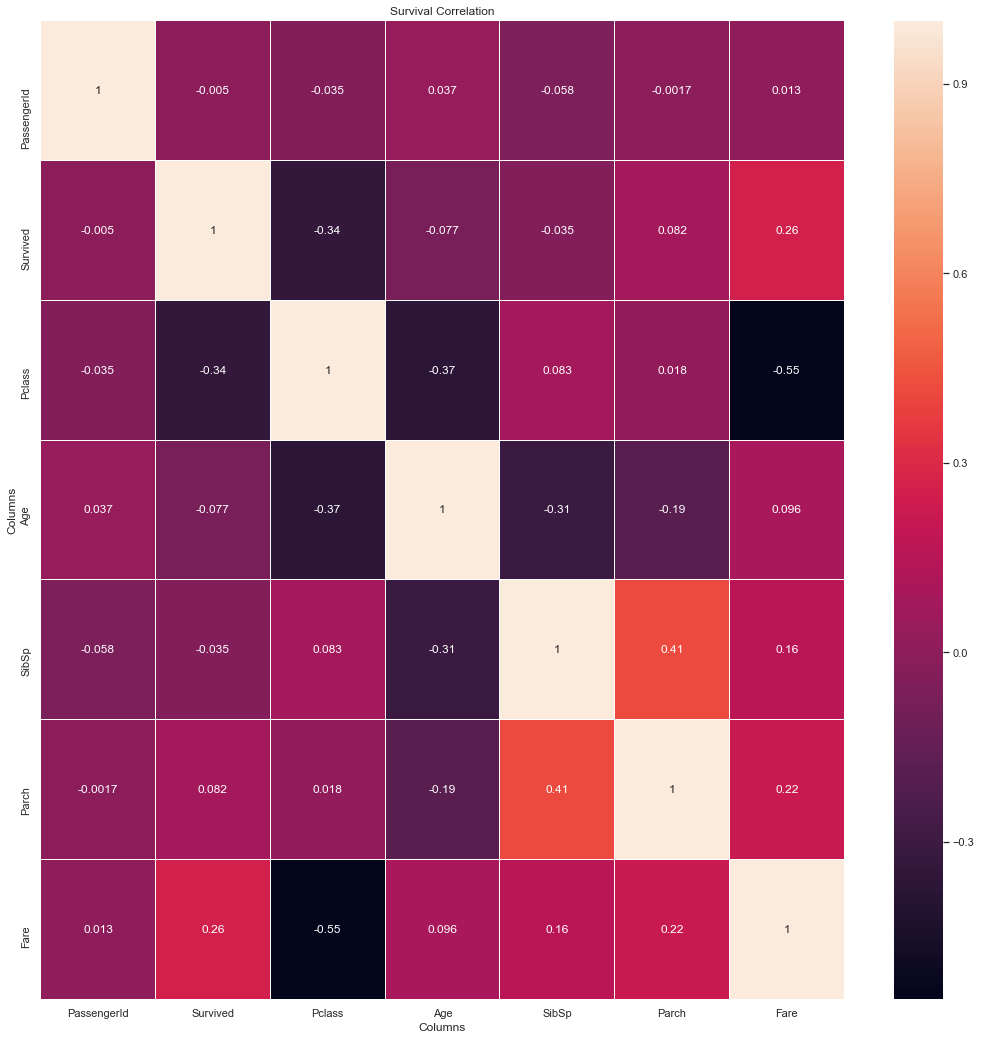

In [8]:
plt.figure(figsize=(18,18))
plt.title('Survival Correlation', fontdict=font)
sns.heatmap(titanic_data.corr(), linewidths=0.1, linecolor='white', annot=True)
plt.xlabel('Columns', fontdict= font)
plt.ylabel('Columns', fontdict= font)
plt.savefig('visualizations/Titanic-Columns-Correlation.png')

## 3. Using Machine Learning model to check the prediction

### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logistic_model = LogisticRegression()

In [10]:
training_data = titanic_data[['PassengerId', 'Pclass', 'Fare']]

In [11]:
training_data.head()

,PassengerId,Pclass,Fare
0,1,3,7.2500
1,2,1,71.2833
2,3,3,7.9250
3,4,1,53.1000
4,5,3,8.0500


### Note: Before working on Machine Learning, take care of the following

#### 1. Your data should not contain any text values. If you have any text data, convert it into numerical data.
#### 2. Make sure there are no missing values. If you have any missing values, try to impute them.

In [12]:
training_data.isnull().sum()

PassengerId    0
Pclass         0
Fare           0
dtype: int64

In [13]:
output_data = titanic_data['Survived']

In [14]:
output_data.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [15]:
training_data.shape[0]

891

### Using Imputer to fill in missing values with the most frequent values for each specific column

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
training_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [18]:
new_training_data = training_imputer.fit_transform(training_data)

In [19]:
training_imputer.statistics_

array([1.  , 3.  , 8.05])

In [20]:
new_training_data

array([[  1.    ,   3.    ,   7.25  ],
       [  2.    ,   1.    ,  71.2833],
       [  3.    ,   3.    ,   7.925 ],
       ...,
       [889.    ,   3.    ,  23.45  ],
       [890.    ,   1.    ,  30.    ],
       [891.    ,   3.    ,   7.75  ]])

### Taking data for Machine Learning and converting it into 2 parts - Train and Test

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X, x_test, Y, y_test = train_test_split(new_training_data, 
                                        output_data, test_size=0.2, 
                                        random_state=42)

In [23]:
y_test.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

### Training your Machine Learning model

In [24]:
logistic_model.fit(X, Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Making prediction about survival

In [25]:
single_prediction = logistic_model.predict([[5000, 2.0, 20.0]])

In [26]:
single_prediction

array([0], dtype=int64)

### Checking the prediction score of training data

In [27]:
training_prediction = logistic_model.predict(x_test)

In [28]:
training_prediction[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Checking for Accuracy of our model

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [30]:
confusion = confusion_matrix(training_prediction, y_test)
confusion

array([[89, 37],
       [16, 37]], dtype=int64)

In [31]:
training_accuracy = accuracy_score(training_prediction, y_test)

In [32]:
training_accuracy

0.7039106145251397

### Checking the coefficients of each parameter.

In [33]:
logistic_model.coef_

array([[ 8.08904828e-05, -6.20822147e-01,  5.45548337e-03]])

In [34]:
details = pd.DataFrame(logistic_model.coef_.T, index=training_data.columns, columns=['Values'])

In [35]:
details

,Values
PassengerId,0.000081
Pclass,-0.620822
Fare,0.005455


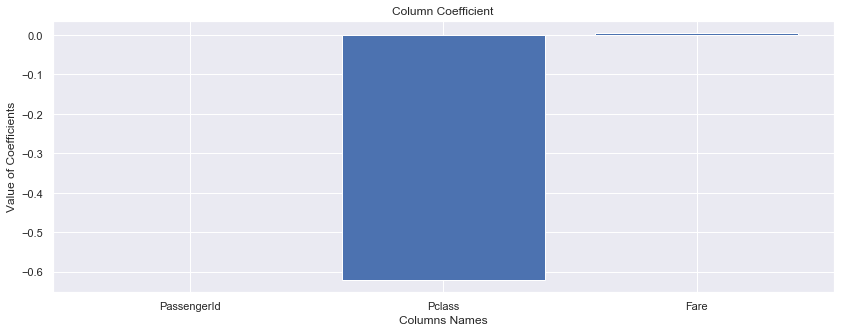

In [36]:
plt.figure(figsize=(14, 5))
plt.xlabel('Columns Names', fontdict=font)
plt.ylabel('Value of Coefficients', fontdict=font)
plt.title('Column Coefficient', fontdict=font)
plt.bar(x=details.index, height=details['Values'])
plt.savefig('visualizations/Column-vs-Coefficients.png')

### Make prediction on a already defined list

In [36]:
test_data = pd.read_csv('data/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
test_data = test_data[['PassengerId', 'Pclass', 'Fare']]
test_data.head()

,PassengerId,Pclass,Fare
0,892,3,7.8292
1,893,3,7.0000
2,894,2,9.6875
3,895,3,8.6625
4,896,3,12.2875


### Converting the data

In [38]:
from sklearn.impute import SimpleImputer

In [39]:
test_data_imputed = test_data

In [40]:
imputer = SimpleImputer(strategy='most_frequent')

In [41]:
imputer.fit(test_data_imputed)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='most_frequent', verbose=0)

In [42]:
imputer.statistics_

array([892.  ,   3.  ,   7.75])

In [43]:
test_data.isnull().any()

PassengerId    False
Pclass         False
Fare            True
dtype: bool

In [44]:
test_data_predicion = imputer.transform(test_data_imputed)

In [45]:
test_data_predicion

array([[ 892.    ,    3.    ,    7.8292],
       [ 893.    ,    3.    ,    7.    ],
       [ 894.    ,    2.    ,    9.6875],
       ...,
       [1307.    ,    3.    ,    7.25  ],
       [1308.    ,    3.    ,    8.05  ],
       [1309.    ,    3.    ,   22.3583]])

In [46]:
test_data_imputed = pd.DataFrame(test_data_predicion, columns=test_data.columns)

In [47]:
test_data_imputed.head()

,PassengerId,Pclass,Fare
0,892.0,3.0,7.8292
1,893.0,3.0,7.0000
2,894.0,2.0,9.6875
3,895.0,3.0,8.6625
4,896.0,3.0,12.2875


In [48]:
test_prediction = logistic_model.predict(test_data_imputed)

In [49]:
test_prediction[:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Write the predictions made on a csv file, with Passenger ID and Survived

In [50]:
submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': test_prediction})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [51]:
submission.to_csv('data/submission-logistic.csv')

### Categorical-Categorical Bivariate analysis (Sex vs Survived)

In [52]:
pd.crosstab(titanic_data['Sex'], titanic_data['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


## Checking relation between Categorical and Continuous Data

### Researchers once surveyed college students on their Facebook use. The following two-way table displays data for the sample of students who responded to the survey.
<img src="notes-images/Two-way-table.png">

#### Question -  How many students in the survey were in the age category of 18 to 22?
#### Answer - 82

### Print the stacked column chart to describe the gender of the person who survived

In [53]:
male_data_unsurvived = titanic_data['Sex'][(titanic_data['Sex']=='male') & (titanic_data['Survived']==0)].shape[0]
male_data_unsurvived

468

In [54]:
male_data_survived = titanic_data['Sex'][(titanic_data['Sex']=='male') & (titanic_data['Survived']==1)].shape[0]
male_data_survived

109

In [55]:
female_data_unsurvived = titanic_data['Sex'][(titanic_data['Sex']=='female') & (titanic_data['Survived']==0)].shape[0]
female_data_unsurvived

81

In [56]:
female_data_survived = titanic_data['Sex'][(titanic_data['Sex']=='female') & (titanic_data['Survived']==1)].shape[0]
female_data_survived

233

In [57]:
gender_survived_data = pd.DataFrame()

In [58]:
gender_survived_data['Unsurvived'] = [male_data_unsurvived, female_data_unsurvived]

In [59]:
gender_survived_data

,Unsurvived
0,468
1,81


In [60]:
gender_survived_data['Survived'] = [male_data_survived, female_data_survived]

In [61]:
gender_survived_data

,Unsurvived,Survived
0,468,109
1,81,233


In [62]:
gender_survived_data.index = ["Male's Data", "Female's Data"]

In [63]:
gender_survived_data

,Unsurvived,Survived
Male's Data,468,109
Female's Data,81,233


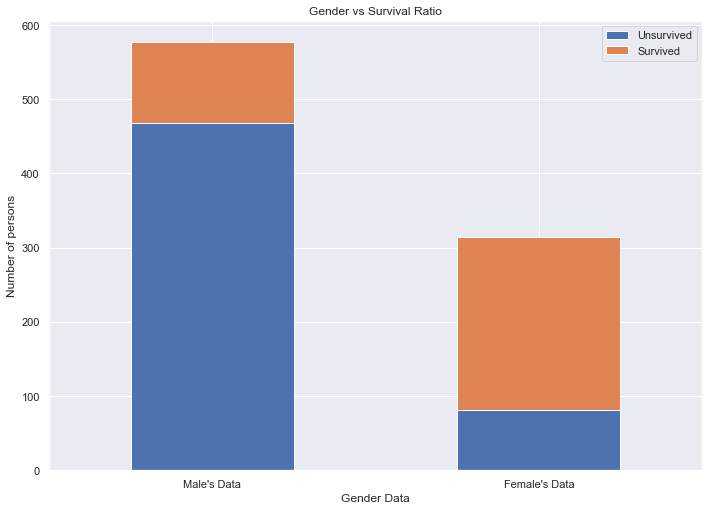

In [64]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
gender_survived_data.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.xlabel('Gender Data', fontdict=font)
plt.ylabel('Number of persons', fontdict=font)
plt.title('Gender vs Survival Ratio', fontdict=font)
plt.savefig('visualizations/Gender-vs-Survival.png')